In [1]:
import numpy
import pandas

In [2]:
import networkx
#演算法
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra

In [3]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [5]:
#中文字型檔
my_font=FontProperties(fname=r"C:/Windows/Fonts/SimSun.ttc",size=14)
my_font.get_name()

'SimSun'

In [6]:
node_info={
    '忠孝店':{'weight':numpy.random.randint(1,100),'id':0},
    'B':{'weight':numpy.random.randint(1,100),'id':1},
    'C':{'weight':numpy.random.randint(1,100),'id':2},
    '經國店':{'weight':numpy.random.randint(1,100),'id':3},
    'E':{'weight':numpy.random.randint(1,100),'id':4},
    'F':{'weight':numpy.random.randint(1,100),'id':5},
    '文化店':{'weight':numpy.random.randint(1,100),'id':6},
    'H':{'weight':numpy.random.randint(1,100),'id':7},
    'I':{'weight':numpy.random.randint(1,100),'id':8},
    'J':{'weight':numpy.random.randint(1,100),'id':9},
    
}

In [7]:
node_info 

{'忠孝店': {'weight': 27, 'id': 0},
 'B': {'weight': 13, 'id': 1},
 'C': {'weight': 14, 'id': 2},
 '經國店': {'weight': 56, 'id': 3},
 'E': {'weight': 57, 'id': 4},
 'F': {'weight': 82, 'id': 5},
 '文化店': {'weight': 22, 'id': 6},
 'H': {'weight': 49, 'id': 7},
 'I': {'weight': 94, 'id': 8},
 'J': {'weight': 30, 'id': 9}}

In [8]:
G=networkx.Graph()

In [9]:
for node in node_info:
    G.add_node(node,weight=node_info[node]['weight'])

In [10]:
list(G.nodes(data=True))

[('忠孝店', {'weight': 27}),
 ('B', {'weight': 13}),
 ('C', {'weight': 14}),
 ('經國店', {'weight': 56}),
 ('E', {'weight': 57}),
 ('F', {'weight': 82}),
 ('文化店', {'weight': 22}),
 ('H', {'weight': 49}),
 ('I', {'weight': 94}),
 ('J', {'weight': 30})]

In [33]:
list(G.nodes(data='weight'))

[('忠孝店', 27),
 ('B', 13),
 ('C', 14),
 ('經國店', 56),
 ('E', 57),
 ('F', 82),
 ('文化店', 22),
 ('H', 49),
 ('I', 94),
 ('J', 30)]

In [32]:
#另一種表示方式
list(networkx.get_node_attributes(G,'weight').values())

[27, 13, 14, 56, 57, 82, 22, 49, 94, 30]

In [34]:
G.add_edge('忠孝店','B',weight=numpy.random.randint(1,100))
G.add_edge('B','C',weight=numpy.random.randint(1,100))
G.add_edge('B','經國店',weight=numpy.random.randint(1,100))
G.add_edge('C','F',weight=numpy.random.randint(1,100))
G.add_edge('經國店','文化店',weight=numpy.random.randint(1,100))
G.add_edge('E','H',weight=numpy.random.randint(1,100))
G.add_edge('E','I',weight=numpy.random.randint(1,100))
G.add_edge('E','J',weight=numpy.random.randint(1,100))
G.add_edge('J','F',weight=numpy.random.randint(1,100))
G.add_edge('J','文化店',weight=numpy.random.randint(1,100))
G.add_edge('忠孝店','E',weight=numpy.random.randint(1,100))

In [35]:
list(G.edges(data=True))

[('忠孝店', 'B', {'weight': 56}),
 ('忠孝店', 'E', {'weight': 13}),
 ('B', 'C', {'weight': 57}),
 ('B', '經國店', {'weight': 75}),
 ('C', 'F', {'weight': 70}),
 ('經國店', '文化店', {'weight': 57}),
 ('E', 'H', {'weight': 86}),
 ('E', 'I', {'weight': 68}),
 ('E', 'J', {'weight': 24}),
 ('F', 'J', {'weight': 86}),
 ('文化店', 'J', {'weight': 72})]

In [36]:
list(G.edges(data='weight'))

[('忠孝店', 'B', 56),
 ('忠孝店', 'E', 13),
 ('B', 'C', 57),
 ('B', '經國店', 75),
 ('C', 'F', 70),
 ('經國店', '文化店', 57),
 ('E', 'H', 86),
 ('E', 'I', 68),
 ('E', 'J', 24),
 ('F', 'J', 86),
 ('文化店', 'J', 72)]

In [37]:
pos=networkx.circular_layout(G)

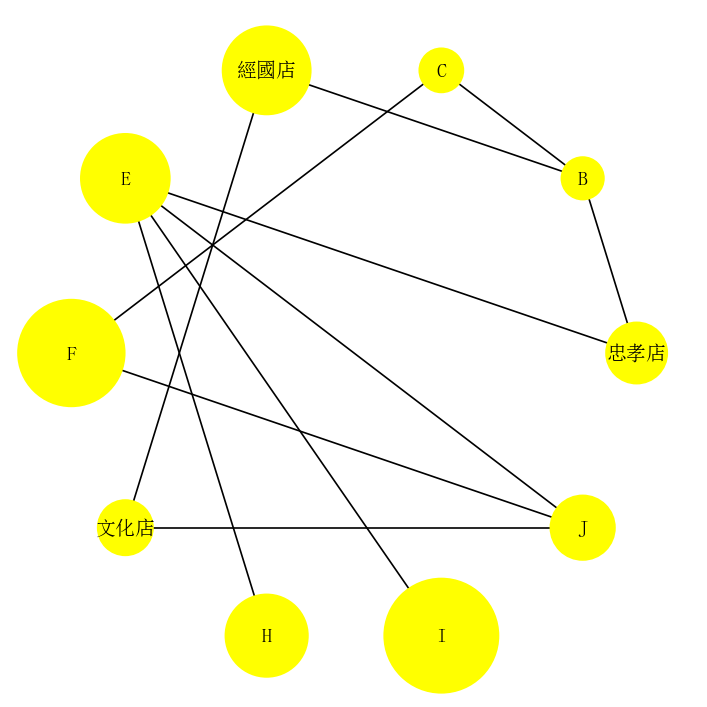

In [38]:
fig,ax=plt.subplots(figsize=(6,6),dpi=120)
networkx.draw(G,pos,
             with_labels=True,
             node_size=[50*node[1]['weight'] for node in list(G.nodes(data=True))],
             node_color=['yellow'],
             font_weight='bold',
             font_family=[my_font.get_name()], #中文名稱
              ax=ax)
plt.tight_layout()
plt.show()

In [39]:
#尋找最短路徑
shortest=single_source_dijkstra(G,source='C',target='H')
shortest

(212, ['C', 'B', '忠孝店', 'E', 'H'])

In [40]:
#驗證最少路徑權重和
ew=networkx.get_edge_attributes(G,'weight')
for e in ew:
    print(e,ew[e])

('忠孝店', 'B') 56
('忠孝店', 'E') 13
('B', 'C') 57
('B', '經國店') 75
('C', 'F') 70
('經國店', '文化店') 57
('E', 'H') 86
('E', 'I') 68
('E', 'J') 24
('F', 'J') 86
('文化店', 'J') 72


In [26]:
def find_edge_weight(nodes):
    w=0
    if nodes in ew.keys(): #正向順序
        w=ew[nodes]
        return w
    if(nodes[1],nodes[0]) in ew.keys(): #反向順序
        w=ew[(nodes[1],nodes[0])]
        return w
    return w

In [27]:
find_edge_weight(('C','B'))

82

In [41]:
weight=0
sp=shortest[1] #路經
for node in range(len(sp)-1):
    weight+=find_edge_weight((sp[node],sp[node+1])) #依照上方路徑將每個邊相加
weight

212

In [43]:
#節點間可能路徑
connections=networkx.all_pairs_node_connectivity(G)

In [47]:
start_node='忠孝店'
for target_node in connections[start_node]:
    print('%s-%s:%3d'%(start_node,target_node,connections[start_node][target_node]))

忠孝店-B:  2
忠孝店-C:  2
忠孝店-經國店:  2
忠孝店-E:  2
忠孝店-F:  2
忠孝店-文化店:  2
忠孝店-H:  1
忠孝店-I:  1
忠孝店-J:  2
